In [1]:
#Loading Packages
import pandas as pd     
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the HeartDisease.csv file
Hrt=pd.read_csv("HeartDisease.csv")

In [3]:
Hrt.columns #column/variable names

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [4]:
Hrt.dtypes #type of the columns

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [5]:
Hrt.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
Hrt.shape #list the number of rows and columns 

(4240, 16)

In [7]:
Hrt.rename(columns={'male':'sex'},inplace=True) # renaming the column name male to sex
Hrt.columns

Index(['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [8]:
Heart_original=Hrt.copy() # making a copy of the dataset

In [9]:
Hrt['sex'].value_counts()

0    2420
1    1820
Name: sex, dtype: int64

In [10]:
Hrt.isnull().sum()  #checking for the count of missing values in each variable

sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
Hrt['cigsPerDay'].mode()[0]

0.0

In [12]:
Hrt['totChol'].median()

234.0

In [13]:
Hrt['BMI'].median()

25.4

In [14]:
#replacing the missing values with mode() to categorical values and median to the numerical values
Hrt['education'].fillna(Hrt['education'].mode()[0],inplace=True)
Hrt['BPMeds'].fillna(Hrt['BPMeds'].mode()[0],inplace=True)
Hrt['cigsPerDay'].fillna(Hrt['cigsPerDay'].mode()[0],inplace=True)

Hrt['BMI'].fillna(Hrt['BMI'].median(),inplace=True)
Hrt['totChol'].fillna(Hrt['totChol'].median(),inplace=True)
Hrt['heartRate'].fillna(Hrt['heartRate'].median(),inplace=True)
Hrt['glucose'].fillna(Hrt['glucose'].median(),inplace=True)

In [15]:
Hrt.isnull().sum()

sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [16]:
#Univariate Analysis for all the variables

In [17]:
Hrt['prevalentStroke'].value_counts(), Hrt['diabetes'].value_counts()

(0    4215
 1      25
 Name: prevalentStroke, dtype: int64, 0    4131
 1     109
 Name: diabetes, dtype: int64)

In [18]:
Hrt=Hrt.drop(['prevalentStroke','diabetes'],axis=1)  # Droping these variables as most of the observations in them are 0

In [19]:
Hrt['currentSmoker'].value_counts(), Hrt['prevalentHyp'].value_counts(),

(0    2145
 1    2095
 Name: currentSmoker, dtype: int64, 0    2923
 1    1317
 Name: prevalentHyp, dtype: int64)

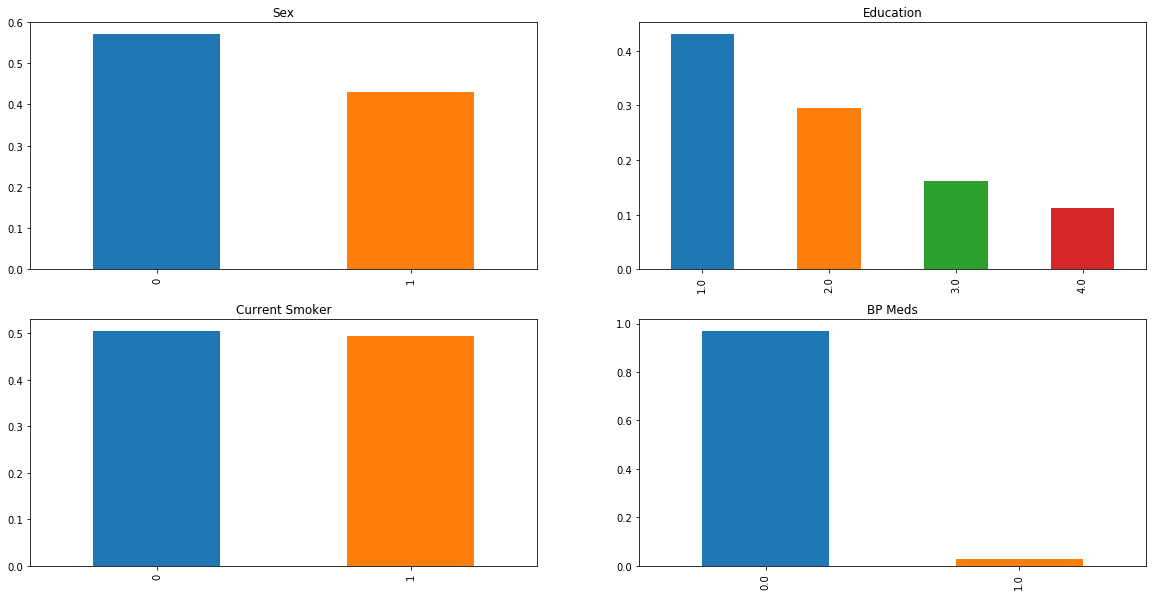

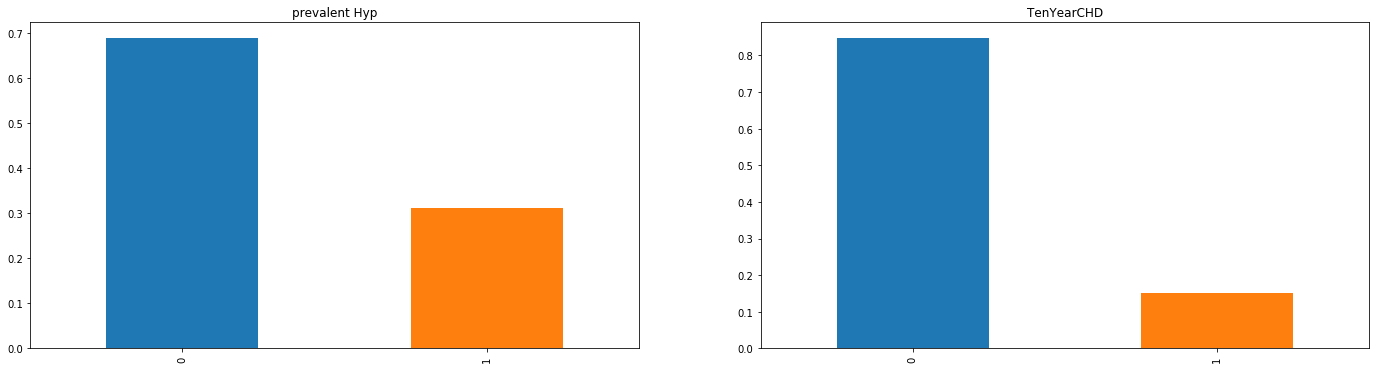

In [20]:
#For categorical values
plt.figure(1)
plt.subplot(221)
Hrt['sex'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Sex")
plt.subplot(222)
Hrt['education'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Education")
plt.subplot(223)
Hrt['currentSmoker'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Current Smoker")
plt.subplot(224)
Hrt['BPMeds'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="BP Meds")
plt.show()
plt.subplot(121)
Hrt['prevalentHyp'].value_counts(normalize=True).plot.bar(figsize=(24,6),title="prevalent Hyp")
plt.subplot(122)
Hrt['TenYearCHD'].value_counts(normalize=True).plot.bar(figsize=(24,6),title="TenYearCHD")
plt.show()

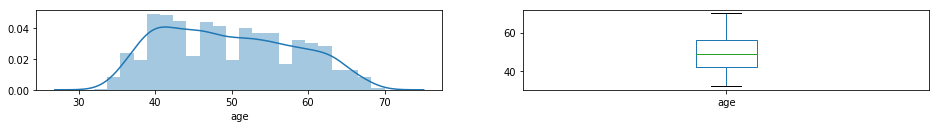

In [21]:
#for numeric values'
plt.figure(1)
plt.subplot(321)
sns.distplot(Hrt['age'])

plt.subplot(322)
Hrt['age'].plot.box(figsize=(16,5))
plt.show()

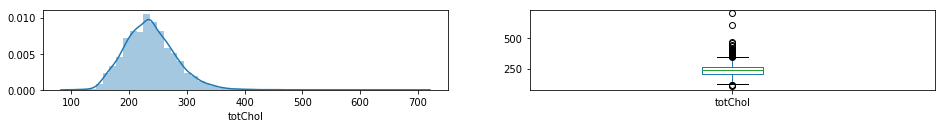

In [22]:
plt.figure(1)
plt.subplot(321)
sns.distplot(Hrt['totChol'])
plt.subplot(322)
Hrt['totChol'].plot.box(figsize=(16,5))
plt.show()

In [23]:
Hrt=Hrt.round({'totChol':0,'sysBP':0,'BMI':0,'heartRate':0,'glucose':0})

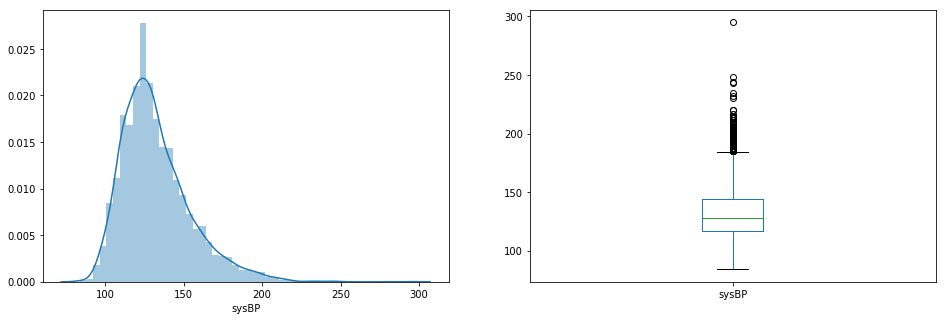

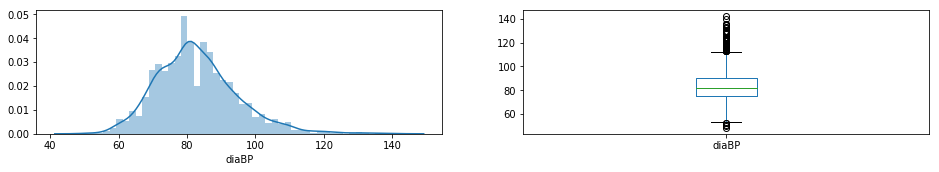

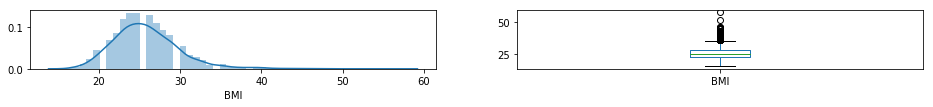

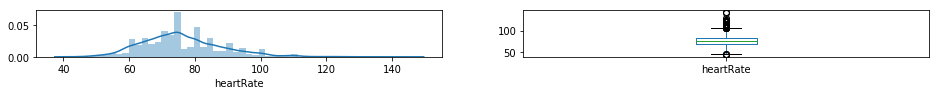

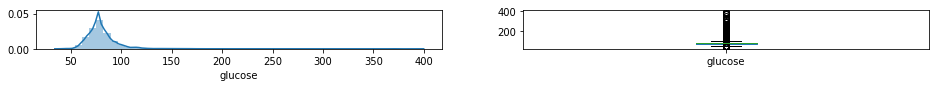

In [24]:
plt.figure(1)
plt.subplot(121)
sns.distplot(Hrt['sysBP'])
plt.subplot(122)
Hrt['sysBP'].plot.box(figsize=(16,5))
plt.show()

plt.figure(1)
plt.subplot(221)
sns.distplot(Hrt['diaBP'])
plt.subplot(222)
Hrt['diaBP'].plot.box(figsize=(16,5))
plt.show()

plt.figure(1)
plt.subplot(421)
sns.distplot(Hrt['BMI'])
plt.subplot(422)
Hrt['BMI'].plot.box(figsize=(16,5))
plt.show()

plt.figure(1)
plt.subplot(521)
sns.distplot(Hrt['heartRate'])
plt.subplot(522)
Hrt['heartRate'].plot.box(figsize=(16,5))
plt.show()

plt.figure(1)
plt.subplot(621)
sns.distplot(Hrt['glucose'])
plt.subplot(622)
Hrt['glucose'].plot.box(figsize=(16,5))
plt.show()

In [25]:
#Bivariate Analysis

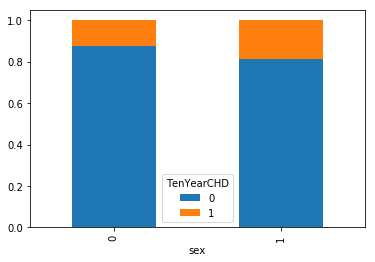

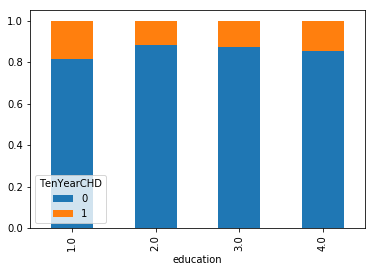

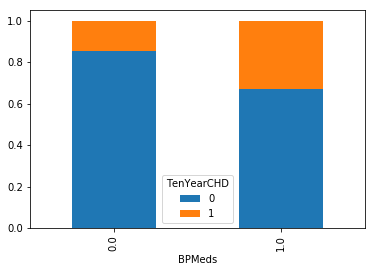

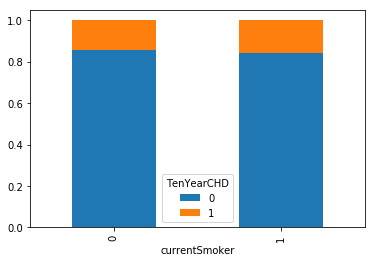

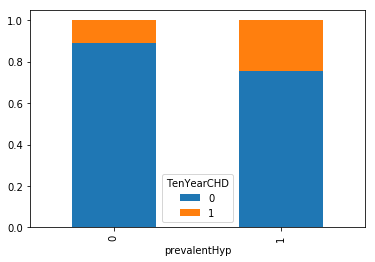

In [26]:
#BiVarriate Analysis for categorical values
Sex=pd.crosstab(Hrt['sex'],Hrt['TenYearCHD'])
Sex.div(Sex.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

Education=pd.crosstab(Hrt['education'],Hrt['TenYearCHD'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

BPMeds=pd.crosstab(Hrt['BPMeds'],Hrt['TenYearCHD'])
BPMeds.div(BPMeds.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

currentSmoker=pd.crosstab(Hrt['currentSmoker'],Hrt['TenYearCHD'])
currentSmoker.div(currentSmoker.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

prevalentHyp=pd.crosstab(Hrt['prevalentHyp'],Hrt['TenYearCHD'])
prevalentHyp.div(prevalentHyp.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

In [27]:
Hrt['cigsPerDay'].max()

70.0

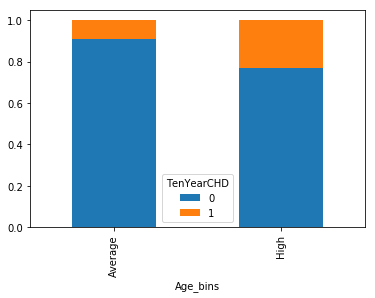

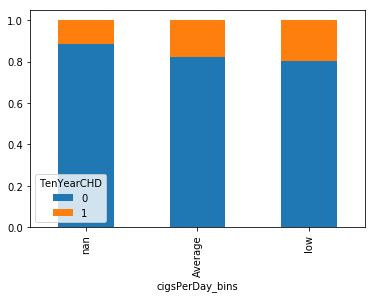

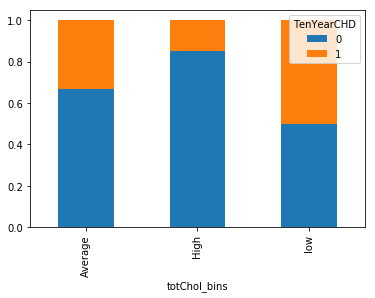

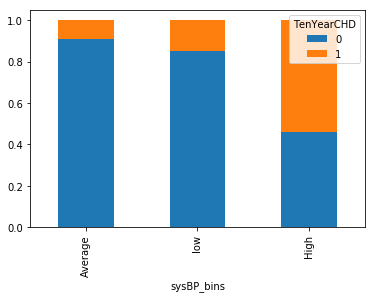

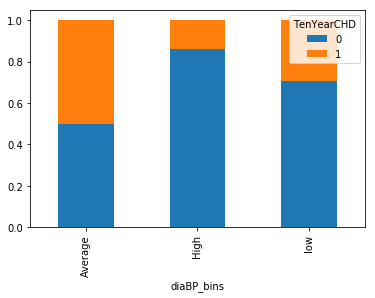

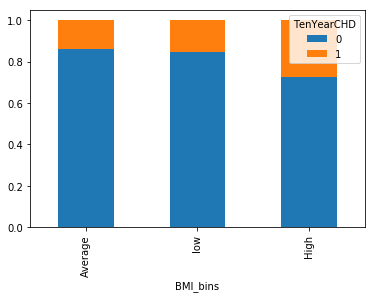

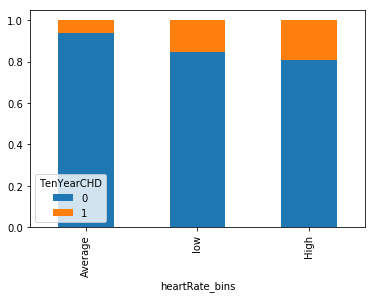

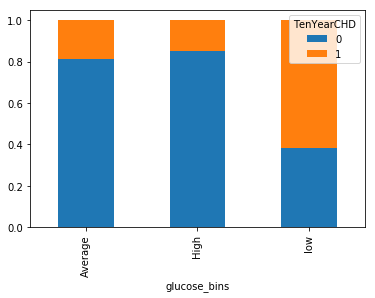

In [28]:
#Bivariate analysis for numeric values are done by creating bins according for each variable and finding the impact of TenYearCHD
bins=[0,30,50,800]
group=['low','Average','High']
Hrt['Age_bins']=pd.cut(Hrt['age'],bins,labels=group)
Age_bins=pd.crosstab(Hrt['Age_bins'],Hrt['TenYearCHD'])
Age_bins.div(Age_bins.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

bins=[0,10,40,80]
group=['low','Average','High']
Hrt['cigsPerDay_bins']=pd.cut(Hrt['cigsPerDay'],bins,labels=group)
cigsPerDay_bins=pd.crosstab(Hrt['cigsPerDay_bins'],Hrt['TenYearCHD'])
cigsPerDay_bins.div(cigsPerDay_bins.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

bins=[0,120,400,800]
group=['low','Average','High']
Hrt['totChol_bins']=pd.cut(Hrt['totChol'],bins,labels=group)
totChol_bins=pd.crosstab(Hrt['totChol_bins'],Hrt['TenYearCHD'])
totChol_bins.div(totChol_bins.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

bins=[0,100,200,400]
group=['low','Average','High']
Hrt['sysBP_bins']=pd.cut(Hrt['sysBP'],bins,labels=group)
sysBP_bins=pd.crosstab(Hrt['sysBP_bins'],Hrt['TenYearCHD'])
sysBP_bins.div(sysBP_bins.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

bins=[0,50,100,200]
group=['low','Average','High']
Hrt['diaBP_bins']=pd.cut(Hrt['diaBP'],bins,labels=group)
diaBP_bins=pd.crosstab(Hrt['diaBP_bins'],Hrt['TenYearCHD'])
diaBP_bins.div(diaBP_bins.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

bins=[0,20,40,70]
group=['low','Average','High']
Hrt['BMI_bins']=pd.cut(Hrt['BMI'],bins,labels=group)
BMI_bins=pd.crosstab(Hrt['BMI_bins'],Hrt['TenYearCHD'])
BMI_bins.div(BMI_bins.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)


bins=[0,50,100,200]
group=['low','Average','High']
Hrt['heartRate_bins']=pd.cut(Hrt['heartRate'],bins,labels=group)
heartRate_bins=pd.crosstab(Hrt['heartRate_bins'],Hrt['TenYearCHD'])
heartRate_bins.div(heartRate_bins.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)


bins=[0,50,200,500]
group=['low','Average','High']
Hrt['glucose_bins']=pd.cut(Hrt['glucose'],bins,labels=group)
glucose_bins=pd.crosstab(Hrt['glucose_bins'],Hrt['TenYearCHD'])
glucose_bins.div(glucose_bins.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)



In [29]:
#From above anal;ysis, CurrentSmoker has no impact and all other variables shows the impact on TenYearCHD variable

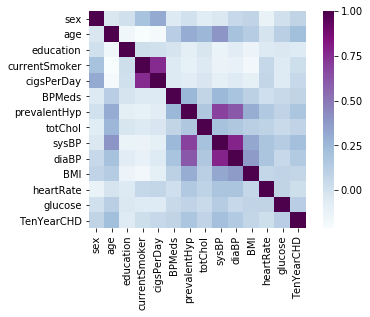

In [30]:
#Building a heatmap for checking the corelation between the variables. Brighter the color, higher the corelation between those variables
matrix=Hrt.corr()
plt.subplot()
sns.heatmap(matrix,square=True,cmap=('BuPu'))

In [31]:
#From the above heatmap, currentSmoker and cigsPerDay are highly corelated, also SysBP-diaBP, PrevalentHyp-sysBP,PrevalentHyp-diaBp..


In [32]:
Hrt=Hrt.drop(['Age_bins','cigsPerDay_bins','totChol_bins','sysBP_bins','diaBP_bins','BMI_bins','heartRate_bins','glucose_bins'],axis=1)

In [33]:
#removing the outliers by doing the log transformation 

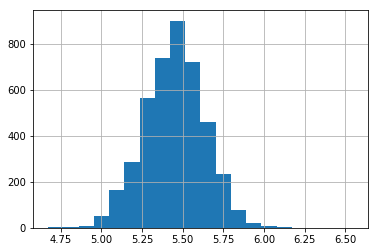

In [34]:
Hrt['totChol_log']=np.log(Hrt['totChol'])
Hrt['totChol_log'].hist(bins=20)

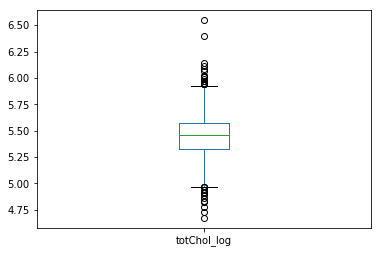

In [35]:
Hrt['totChol_log'].plot.box()

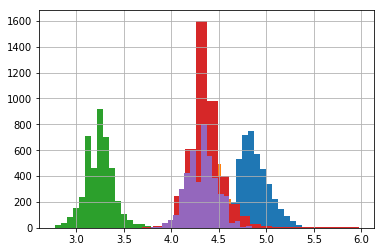

In [36]:
Hrt['sysBP_log']=np.log(Hrt['sysBP'])
Hrt['sysBP_log'].hist(bins=20)

Hrt['diaBP_log']=np.log(Hrt['diaBP'])
Hrt['diaBP_log'].hist(bins=20)

Hrt['BMI_log']=np.log(Hrt['BMI'])
Hrt['BMI_log'].hist(bins=20)

Hrt['glucose_log']=np.log(Hrt['glucose'])
Hrt['glucose_log'].hist(bins=20)

Hrt['heartRate_log']=np.log(Hrt['heartRate'])
Hrt['heartRate_log'].hist(bins=20)

In [37]:
Hrt.columns

Index(['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentHyp', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose', 'TenYearCHD', 'totChol_log', 'sysBP_log', 'diaBP_log',
       'BMI_log', 'glucose_log', 'heartRate_log'],
      dtype='object')

In [38]:
Hrt=Hrt.drop(['totChol','diaBP','sysBP','BMI','glucose','heartRate'],axis=1)

In [39]:
Hrt.columns

Index(['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentHyp', 'TenYearCHD', 'totChol_log', 'sysBP_log', 'diaBP_log',
       'BMI_log', 'glucose_log', 'heartRate_log'],
      dtype='object')

In [40]:
#To do the logistic regression, we split the Hrt dataset to x and y datasets, where x contains all the variables except the response variable and y contains only the response variable

In [41]:
x=Hrt.drop('TenYearCHD',1) 

In [42]:
y=Hrt.TenYearCHD

In [43]:

y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [44]:
y.shape

(4240,)

In [45]:
#Spliting the x and y datasets to train and validation sets (x_train, x_cv and y_train,y_cv).
#we build the model using x_train and y_train and then predict the response for the validation set, x_cv
#Find the accuracy score of the actual response(y_cv) with the predicted response

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(x,y,test_size=0.3)

In [47]:
x_train.shape,x_cv.shape

((2968, 13), (1272, 13))

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [49]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
pred_cv=model.predict(x_cv) # prediction of TenYearCHD for the validation set

In [51]:
accuracy_score(y_cv,pred_cv) #Finding how accurate our predictions

0.8482704402515723

In [52]:
# so our predictions are almost 84% accurate i.e, we identified 84% of TenYearCHD correctly for the given set of covariates.